In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [89]:
with open('timings_RK2.p', 'rb') as fp:
    data = pickle.load(fp)

In [90]:
data_sorted = {}
for key, item in data.items():
    n, chi = key
    time = item
    if chi in data_sorted.keys():
        data_sorted[chi][0].append(n)
        data_sorted[chi][1].append(time)
    else:
        data_sorted[chi] = [[n], [chi]]

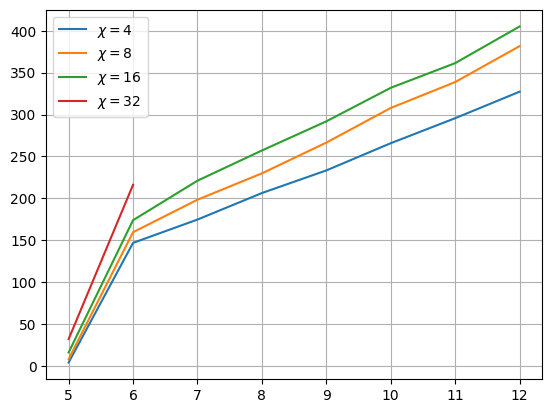

In [91]:
fig, ax = plt.subplots()
x_ticks = None
for key, item in data_sorted.items():
    plt.plot(item[0], item[1], label=f'$\chi = {key}$')
    if x_ticks == None:
        x_ticks = item[0]
# ax.set_yscale('log')
ax.set_xticks(x_ticks)
ax.grid()
plt.legend()
plt.show()

In [92]:
data_sorted

{4: [[5, 6, 7, 8, 9, 10, 11, 12],
  [4,
   146.77767848968506,
   174.62327456474304,
   206.2383873462677,
   233.266987323761,
   265.76246523857117,
   295.5954957008362,
   327.2472252845764]],
 8: [[5, 6, 7, 8, 9, 10, 11, 12],
  [8,
   159.52970671653748,
   198.31188297271729,
   229.75995874404907,
   266.4552867412567,
   307.80817461013794,
   338.71069622039795,
   381.6093018054962]],
 16: [[5, 6, 7, 8, 9, 10, 11, 12],
  [16,
   173.85794806480408,
   221.01946258544922,
   257.0549085140228,
   291.85848784446716,
   331.8804793357849,
   361.3395414352417,
   405.10465574264526]],
 32: [[5, 6], [32, 216.101722240448]]}

In [93]:
# Reference data
n_ref = [5, 6, 7, 8, 9, 10, 11, 12]
chi4 = [12, 13, 15, 18, 23, 26, 30, 30]
chi8 = [15, 18, 22, 25, 30, 31, 36, 39]
chi16 = [15, 25, 32, 39, 45, 50, 56, 60]
chi32 = [15, 40, 70, 100, 150, 180, 195, 205]
chi64 = [15, 80, 400, 800, 1200, 1600, 1900, 2000]
colors = ['blue', 'green', 'red', 'turquoise', 'violet']
data = [chi4, chi8, chi16, chi32, chi64]

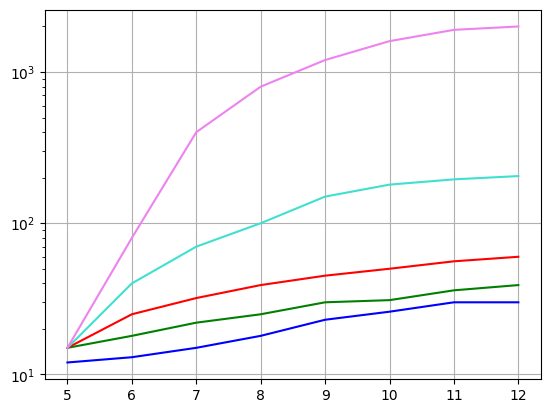

In [94]:
fig, ax = plt.subplots()
plt.plot(n_ref, chi4, c='blue')
plt.plot(n_ref, chi8, c='green')
plt.plot(n_ref, chi16, c='red')
plt.plot(n_ref, chi32, c='turquoise')
plt.plot(n_ref, chi64, c='violet')
ax.grid()
ax.set_yscale('log')

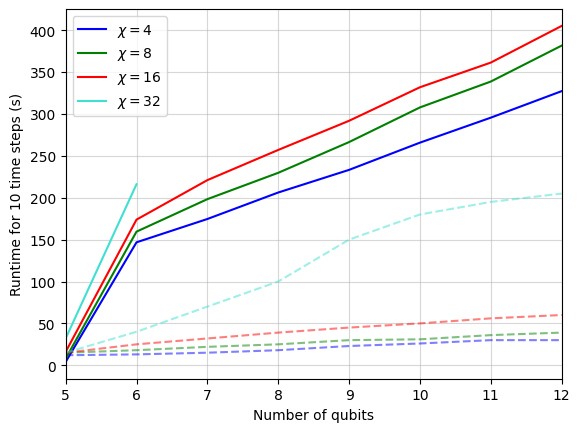

In [100]:
fig, ax = plt.subplots()
x_ticks = None
for i, (key, item) in enumerate(data_sorted.items()):
    plt.plot(item[0], item[1], label=f'$\chi = {key}$', c=colors[i])
    plt.plot(n_ref, data[i], c=colors[i], ls='dashed', alpha=0.5)
    if x_ticks == None:
        x_ticks = item[0]
# ax.set_yscale('log')
ax.set_xticks(x_ticks)
ax.grid(alpha=0.5)
ax.set_xlabel("Number of qubits")
ax.set_ylabel("Runtime for 10 time steps (s)")
# ax.set_yscale('log')
ax.set_xlim([5, 12])
plt.legend()
plt.show()